In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/oasis_longitudinal.csv')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [46]:
# basic EDA
print("shape:", df.shape)
print('data types:\n', df.dtypes)
print(df.describe())

shape: (373, 15)
data types:
 Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000

In [47]:
# check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [72]:
# describe potential target variable
target1 = df['Group'] # categorical
print(target1.value_counts())
# can add a bar plot of target to help audience understand balance of dataset

target2 = df['MMSE'] # continuous
print(target2.describe())

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64
count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64


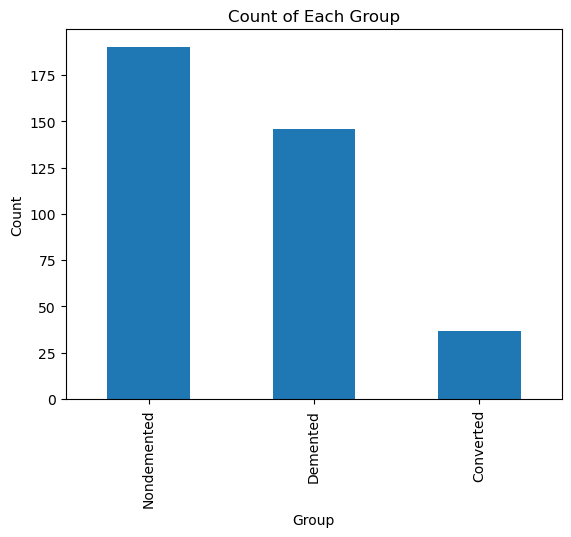

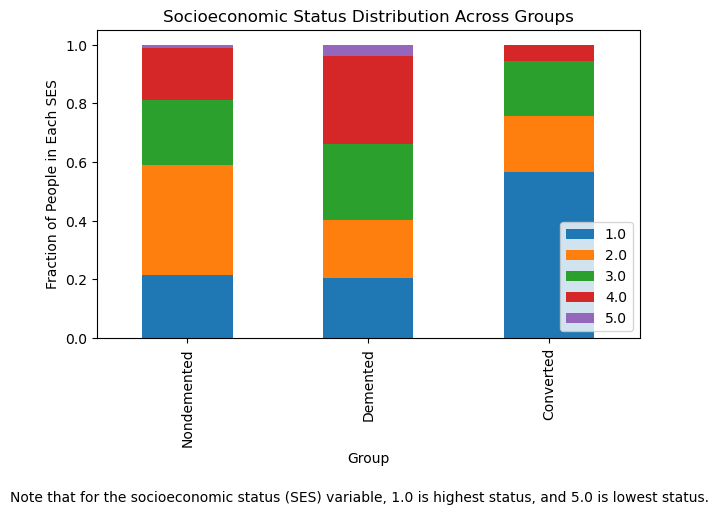

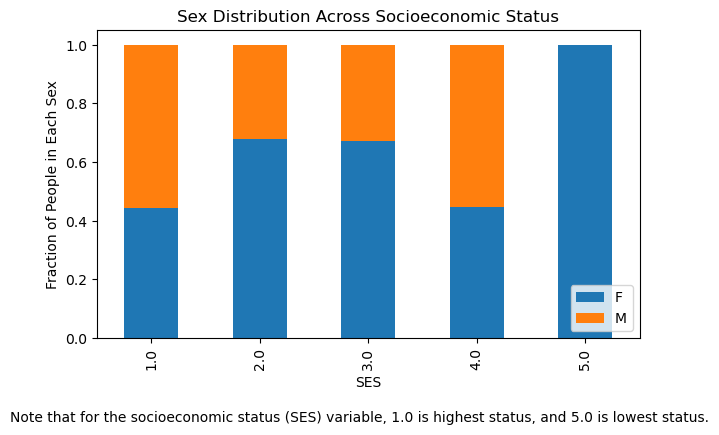

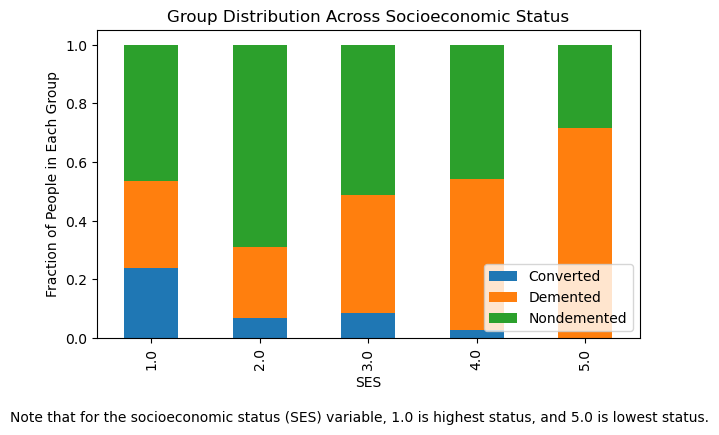

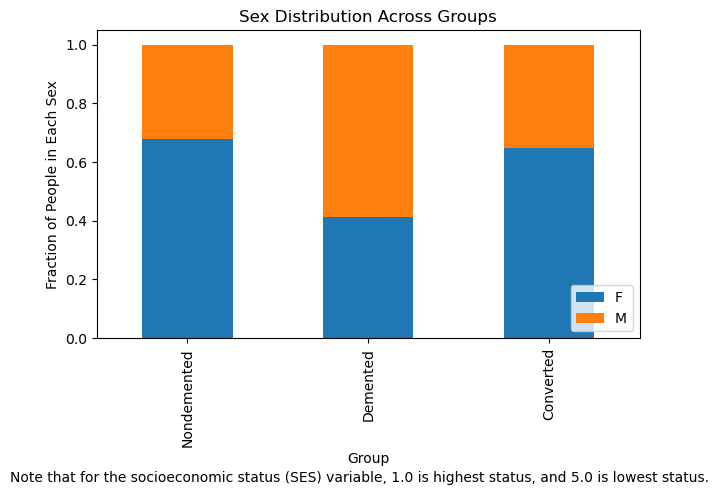

In [86]:
# plot Group
group_counts = df['Group'].value_counts()

# plot the bar chart
group_counts.plot(kind='bar')
plt.title('Count of Each Group')
plt.xlabel('Group')
plt.ylabel('Count')

plt.show()

# plot Group vs. SES
count_matrix = df.groupby(['Group', 'SES']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
group_order = ['Nondemented', 'Demented', 'Converted']
count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each SES')
plt.legend(loc=4)
plt.figtext(0.5, -0.3, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Socioeconomic Status Distribution Across Groups")
plt.show()

# plot SES vs. Sex
count_matrix = df.groupby(['SES', 'M/F']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# group_order = ['Nondemented', 'Demented', 'Converted']
# count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each Sex')
plt.legend(loc=4)
plt.figtext(0.5, -0.1, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Sex Distribution Across Socioeconomic Status")
plt.show()

# plot SES vs. Group
count_matrix = df.groupby(['SES', 'Group']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# group_order = ['Nondemented', 'Demented', 'Converted']
# count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each Group')
plt.legend(loc=4)
plt.figtext(0.5, -0.1, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Group Distribution Across Socioeconomic Status")
plt.show()

# plot Group vs. Sex
count_matrix = df.groupby(['Group', 'M/F']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
group_order = ['Nondemented', 'Demented', 'Converted']
count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each Sex')
plt.legend(loc=4)
plt.figtext(0.5, -0.25, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Sex Distribution Across Groups")
plt.show()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64
count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64


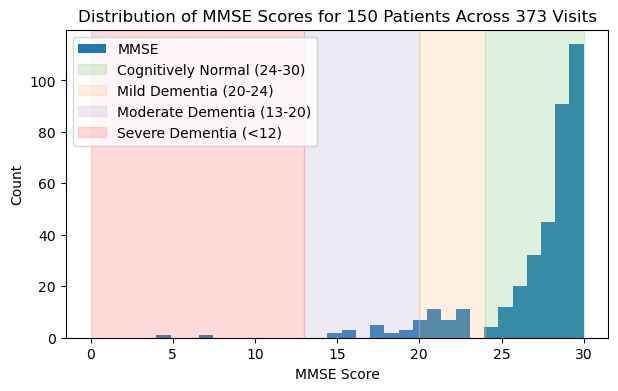

In [71]:
# plot MMSE
plt.figure(figsize=(7,4))
df['MMSE'].plot.hist(bins = 30)
plt.xlabel('MMSE Score')
plt.ylabel('Count')
plt.title('Distribution of MMSE Scores for 150 Patients Across 373 Visits')
plt.axvspan(24, 30, color='#7FC97F', alpha=0.25, label='Cognitively Normal (24-30)')
plt.axvspan(20, 24, color='#FDC086', alpha=0.25, label='Mild Dementia (20-24)')
plt.axvspan(13, 20, color='#BEAED4', alpha=0.25, label='Moderate Dementia (13-20)')
plt.axvspan(0, 13, color='#FF6F69', alpha=0.25, label='Severe Dementia (<12)')
plt.legend(loc='upper left')
plt.show()

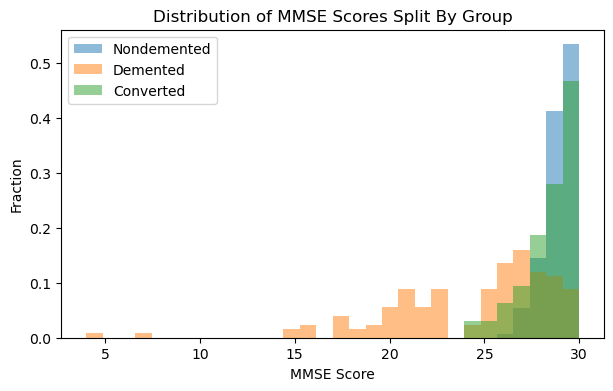

In [70]:
# plot MMSE vs. Group
categories = df['Group'].unique()
bin_range = (df['MMSE'].min(),df['MMSE'].max())

plt.figure(figsize=(7,4))

for c in categories:
    plt.hist(df[df['Group']==c]['MMSE'],alpha=0.5,label=c,range=bin_range,bins=30,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('MMSE Score')
plt.title('Distribution of MMSE Scores Split By Group')
plt.show()

(4.0, 30.0)
[1 2 3 4 5]


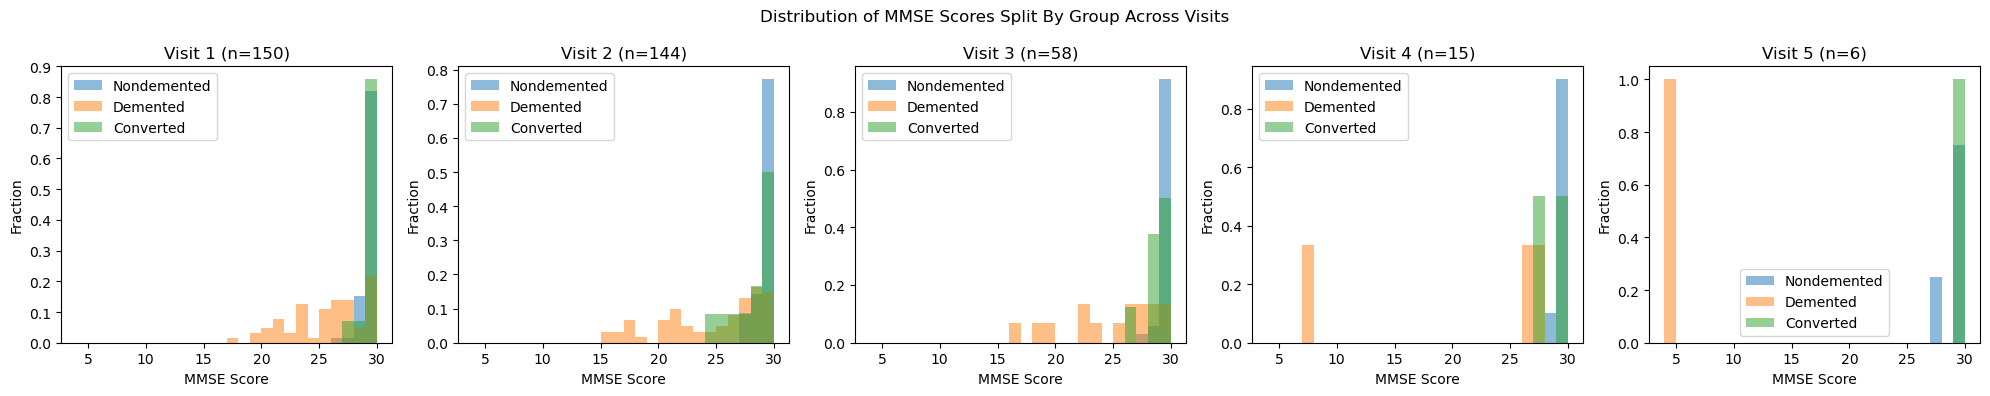

In [49]:
# plot MMSE vs. Group, split on Visit 
groups = df['Group'].unique()
bin_range = (df['MMSE'].min(),df['MMSE'].max())
print(bin_range)

visits = df['Visit'].unique()
print(visits)

plt.figure(figsize=(20,4))
for v in visits:
    plt.subplot(1,5,v)
    curr_entries = df[df['Visit'] == v]
    num_people = curr_entries.shape[0]
    for g in groups:
        plt.hist(curr_entries[curr_entries['Group']==g]['MMSE'],alpha=0.5,label=g,range=bin_range,bins=30-4,density=True)
    plt.legend()
    plt.ylabel('Fraction')
    plt.xlabel('MMSE Score')
    plt.title(f'Visit {v} (n={num_people})')
plt.suptitle('Distribution of MMSE Scores Split By Group Across Visits')
plt.tight_layout()
plt.show()

plot the mmse vs. group but split on visit number

other approaches: for each patient, can combine all features into 1 row, but then would have a lot of missing data

**make sure slides have 3 different types of plots

splitting: drop id, but still do group-based splitting by person id; imbalanced, so stratify (stratified group k fold)

print out number of missing values (leave them; don't imputate) before and after preprocessing and also data shapes of training, validation, and test sets before and after preprocessing

print(df.groupby('CDR')['Group'].value_counts())

stacked bar plot of CDR (ordinal) vs. Group

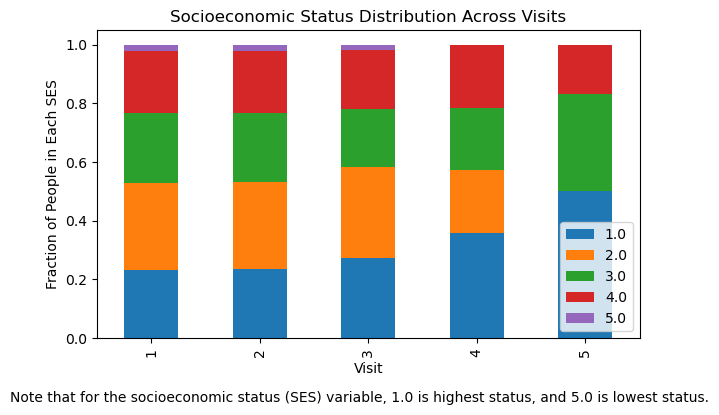

In [50]:
# plot SES vs. # of Visits
count_matrix = df.groupby(['Visit', 'SES']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each SES')
plt.legend(loc=4)
plt.figtext(0.5, -0.05, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Socioeconomic Status Distribution Across Visits")
plt.show()

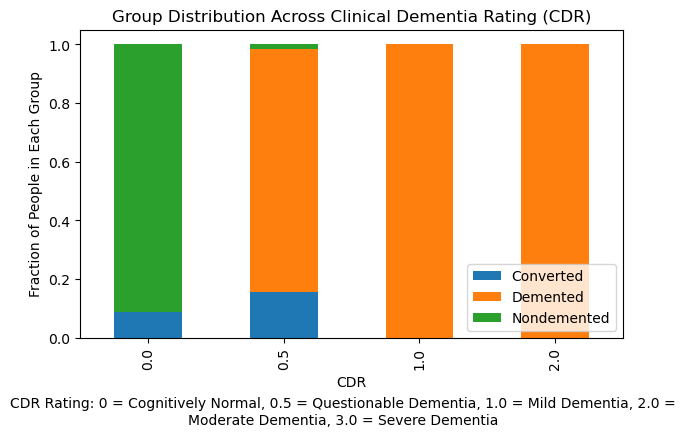

In [51]:
# plot CDR vs. Group
count_matrix = df.groupby(['CDR', 'Group']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each Group')
plt.legend(loc=4)
plt.figtext(0.5, -0.1, 'CDR Rating: 0 = Cognitively Normal, 0.5 = Questionable Dementia, 1.0 = Mild Dementia, 2.0 = Moderate Dementia, 3.0 = Severe Dementia',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Group Distribution Across Clinical Dementia Rating (CDR)")
plt.show()

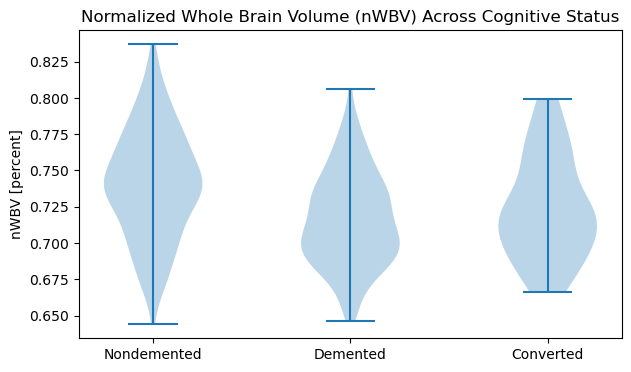

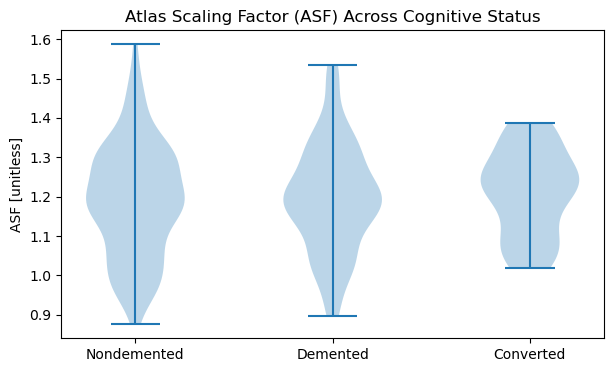

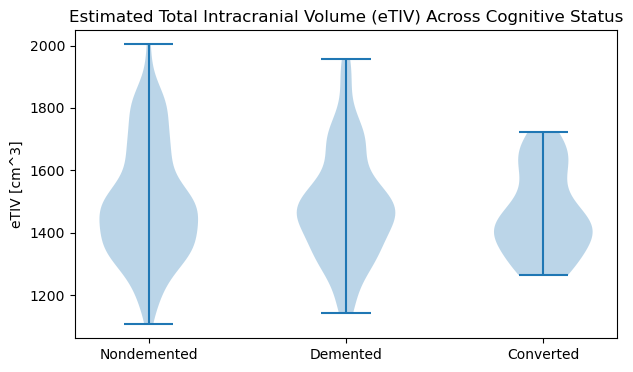

In [60]:
# plot Group vs. eTIV and nWBV and ASF
# nWBV
dataset = [df[df['Group']== 'Nondemented']['nWBV'].values,
           df[df['Group']== 'Demented']['nWBV'].values,
           df[df['Group']== 'Converted']['nWBV'].values]

plt.figure(figsize=(7,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Nondemented','Demented', 'Converted'])
plt.ylabel('nWBV [percent]')
plt.title('Normalized Whole Brain Volume (nWBV) Across Cognitive Status')
plt.show()

# ASF
dataset = [df[df['Group']== 'Nondemented']['ASF'].values,
           df[df['Group']== 'Demented']['ASF'].values,
           df[df['Group']== 'Converted']['ASF'].values]

plt.figure(figsize=(7,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Nondemented','Demented', 'Converted'])
plt.ylabel('ASF [unitless]')
plt.title('Atlas Scaling Factor (ASF) Across Cognitive Status')
plt.show()

# eTIV
dataset = [df[df['Group']== 'Nondemented']['eTIV'].values,
           df[df['Group']== 'Demented']['eTIV'].values,
           df[df['Group']== 'Converted']['eTIV'].values]

plt.figure(figsize=(7,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Nondemented','Demented', 'Converted'])
plt.ylabel('eTIV [cm^3]')
plt.title('Estimated Total Intracranial Volume (eTIV) Across Cognitive Status')
plt.show()

          MR Delay       Age      EDUC      MMSE      eTIV      nWBV       ASF
MR Delay  1.000000  0.205357  0.051630  0.065844  0.119624 -0.105586 -0.123545
Age       0.205357  1.000000 -0.027886  0.055612  0.042348 -0.518359 -0.035067
EDUC      0.051630 -0.027886  1.000000  0.194884  0.257015 -0.012200 -0.241752
MMSE      0.065844  0.055612  0.194884  1.000000 -0.032084  0.341912  0.040052
eTIV      0.119624  0.042348  0.257015 -0.032084  1.000000 -0.210122 -0.988877
nWBV     -0.105586 -0.518359 -0.012200  0.341912 -0.210122  1.000000  0.213476
ASF      -0.123545 -0.035067 -0.241752  0.040052 -0.988877  0.213476  1.000000


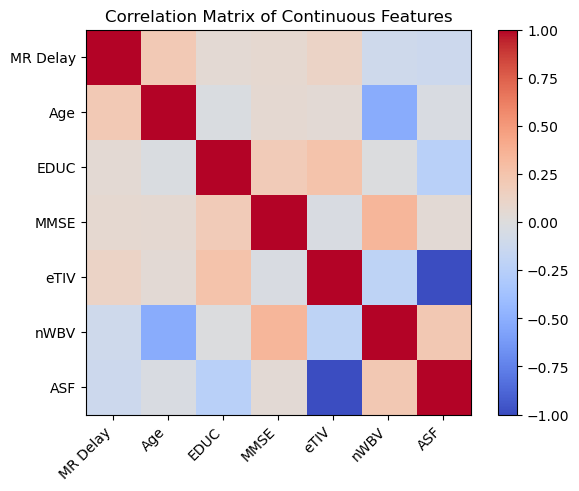

In [69]:
# corr matrix of features
cont_ftrs = ['MR Delay', 'Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']
df_cont_ftrs = df[cont_ftrs]
corr_mat = df_cont_ftrs.corr(method='pearson')
print(corr_mat)

# plot
plt.figure(figsize=(7,5))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(ticks=np.arange(len(df_cont_ftrs.columns)), labels=df_cont_ftrs.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(df_cont_ftrs.columns)), labels=df_cont_ftrs.columns)
plt.colorbar()
plt.title('Correlation Matrix of Continuous Features')
plt.show()

<Figure size 700x500 with 0 Axes>

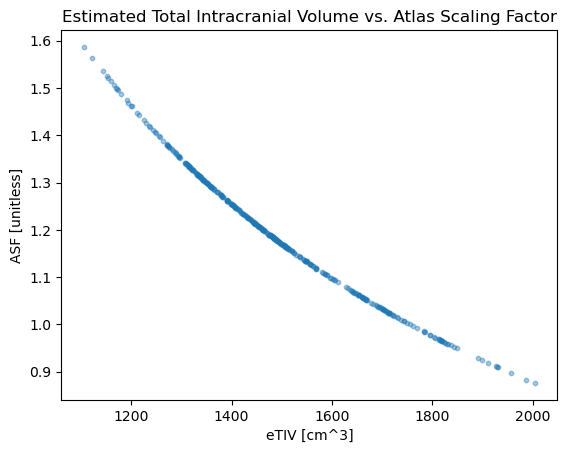

In [68]:
# plot eTIV and ASF
plt.figure(figsize=(7,5))
df.plot.scatter('eTIV','ASF',alpha=0.4,s=10) 
plt.xlabel('eTIV [cm^3]')
plt.ylabel('ASF [unitless]')
plt.title('Estimated Total Intracranial Volume vs. Atlas Scaling Factor')
plt.show()